In [1]:
from __future__ import division
import random
import pprint
import sys
import time
import numpy as np
from optparse import OptionParser
import pickle

from keras import backend as K
from keras.optimizers import Adam, SGD, RMSprop
from keras.layers import Input
from keras.models import Model
from rcnn import config, data_generators
from rcnn import losses as losses
import rcnn.roi_helpers as roi_helpers
from keras.utils import generic_utils

from rcnn.video_parser import get_data

sys.setrecursionlimit(40000)

C = config.Config()

C.use_horizontal_flips = False
C.use_vertical_flips = False
C.rot_90 = False

C.model_path = 'model_recurrent.h5fs'
C.num_rois = int(8)

from rcnn import resnet as nn
C.network = 'resnet50'

all_imgs, classes_count, class_mapping = get_data('./videos/', './annotations/')

if 'bg' not in classes_count:
	classes_count['bg'] = 0
	class_mapping['bg'] = len(class_mapping)

C.class_mapping = class_mapping

inv_map = {v: k for k, v in class_mapping.items()}

print('Training images per class:')
pprint.pprint(classes_count)
print('Num classes (including bg) = {}'.format(len(classes_count)))

random.shuffle(all_imgs)

num_imgs = len(all_imgs)


data_gen = data_generators.video_streamer(all_imgs, classes_count, C, nn.get_img_output_length, K.image_dim_ordering(), mode='train')


Using TensorFlow backend.


Parsing annotation files
Training images per class:
{'bbox': 9922, 'bg': 0}
Num classes (including bg) = 2


In [2]:
X, Y, data = next(data_gen)

In [3]:
Y[1].shape

(2, 8, 38, 38, 96)

In [4]:
from matplotlib import pyplot as plt

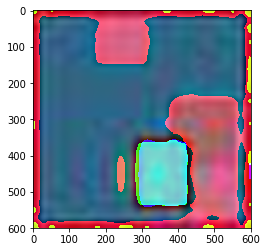

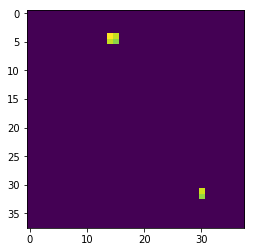

In [8]:
plt.imshow(X[0][7])
plt.show()
plt.imshow(Y[1][0][7].sum(axis=-1))
plt.show()

In [25]:
X[0][2][0].shape

(1, 38, 38, 18)

In [3]:
d = get_data('./videos/', './annotations/')

Parsing annotation files


In [4]:
d[0][0]

[{'bboxes': [{'class': 'bbox', 'x1': 12, 'x2': 14, 'y1': 10, 'y2': 14},
   {'class': 'bbox', 'x1': 24, 'x2': 26, 'y1': 0, 'y2': 4}],
  'filename': './videos/8/0.jpg',
  'height': 32,
  'width': 32},
 {'bboxes': [{'class': 'bbox', 'x1': 11, 'x2': 13, 'y1': 8, 'y2': 12},
   {'class': 'bbox', 'x1': 24, 'x2': 26, 'y1': 2, 'y2': 6}],
  'filename': './videos/8/1.jpg',
  'height': 32,
  'width': 32},
 {'bboxes': [{'class': 'bbox', 'x1': 10, 'x2': 12, 'y1': 6, 'y2': 10},
   {'class': 'bbox', 'x1': 24, 'x2': 26, 'y1': 4, 'y2': 8}],
  'filename': './videos/8/2.jpg',
  'height': 32,
  'width': 32},
 {'bboxes': [{'class': 'bbox', 'x1': 9, 'x2': 11, 'y1': 4, 'y2': 8},
   {'class': 'bbox', 'x1': 24, 'x2': 26, 'y1': 6, 'y2': 10}],
  'filename': './videos/8/3.jpg',
  'height': 32,
  'width': 32},
 {'bboxes': [{'class': 'bbox', 'x1': 8, 'x2': 10, 'y1': 2, 'y2': 6},
   {'class': 'bbox', 'x1': 24, 'x2': 26, 'y1': 7, 'y2': 11}],
  'filename': './videos/8/4.jpg',
  'height': 32,
  'width': 32},
 {'bboxes':

In [11]:
len(d[0])

20